### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam



In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
df=df.fillna("None")

In [ ]:
df.shape

(374, 13)

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df[df["Sleep Disorder"]=="None"]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,None
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,None
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Exploratory Data Analysis

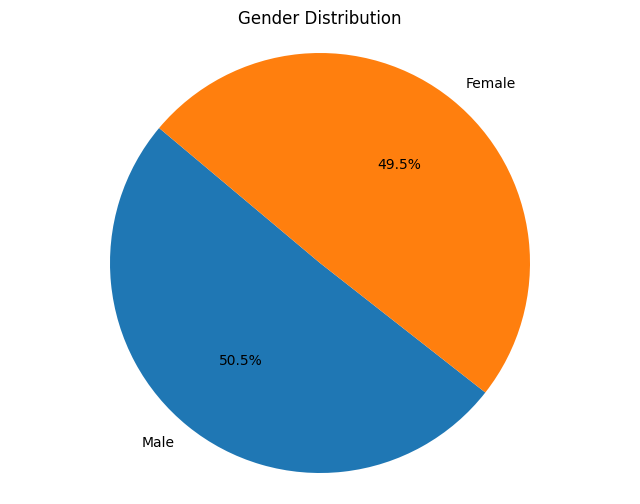

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

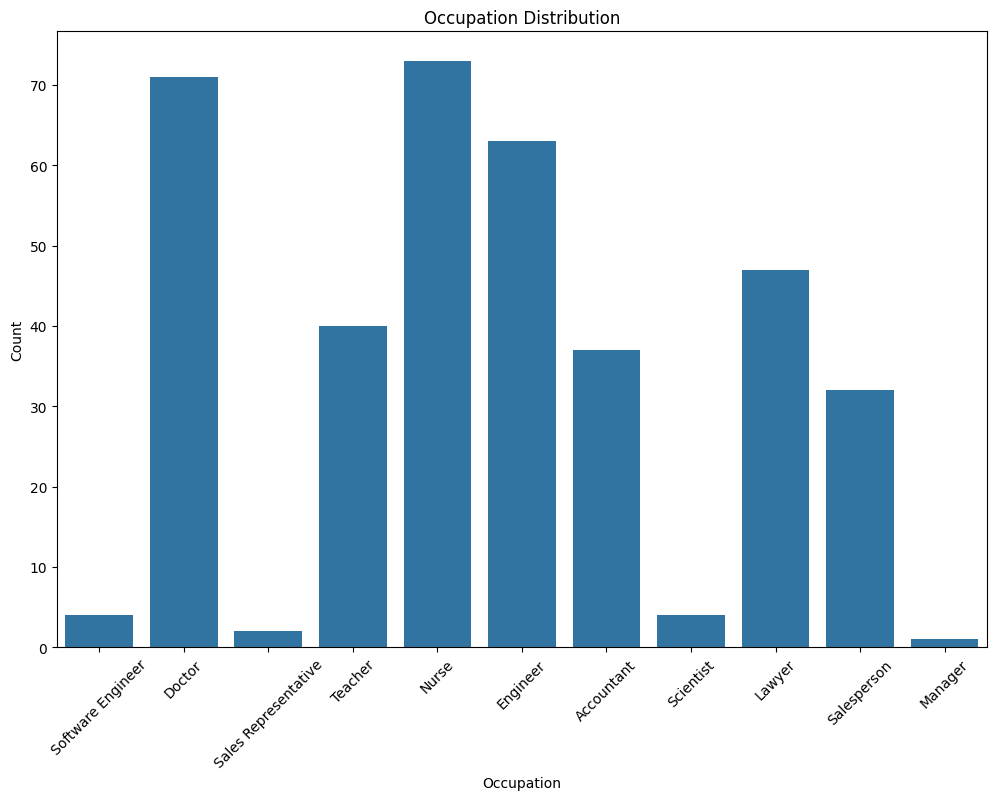

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Occupation')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

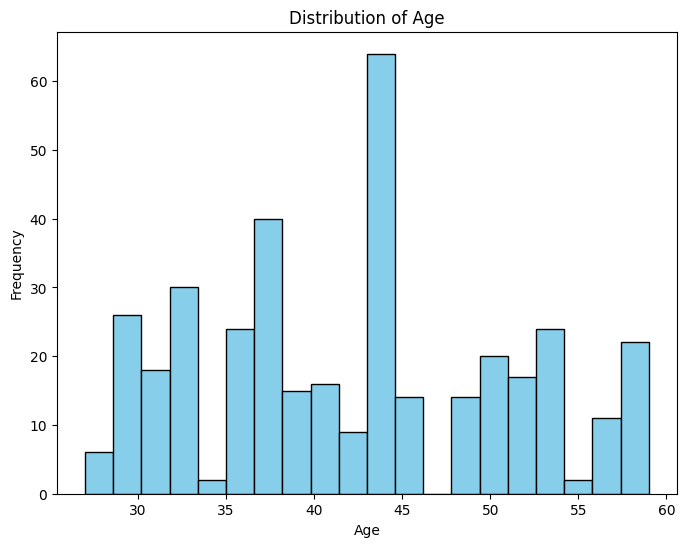

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

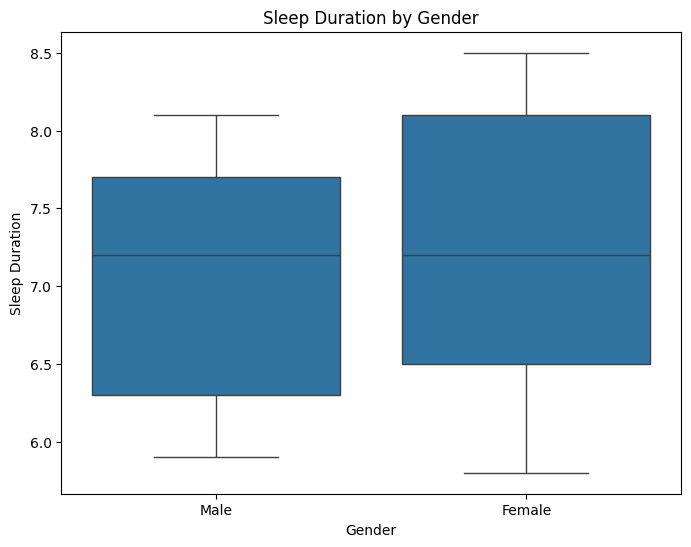

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration by Gender')
plt.show()

In [ ]:
age_groups = []
for i in range(min(df['Age']),max(df['Age']),5):
  age_group = f"{i}-{i+4}"
  age_groups.append(age_group)

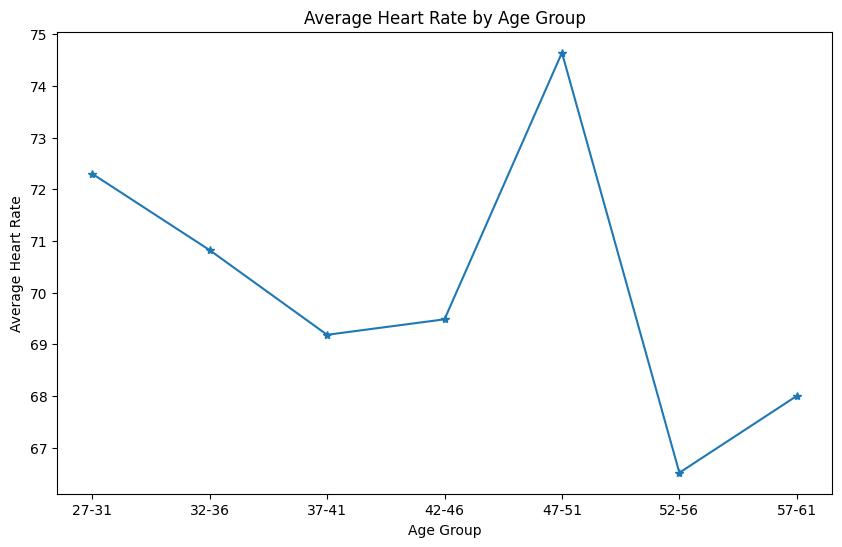

In [ ]:
heart_rates = []

for i in range(min(df['Age']),max(df['Age']),5):
  age_group_df = df[(df['Age'] >= i) & (df['Age'] <= i+4)]
  heart_rate = age_group_df['Heart Rate'].mean()
  heart_rates.append(heart_rate)

plt.figure(figsize=(10, 6))
plt.plot(age_groups, heart_rates,marker='*')
plt.xlabel('Age Group')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Age Group')
plt.show()


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

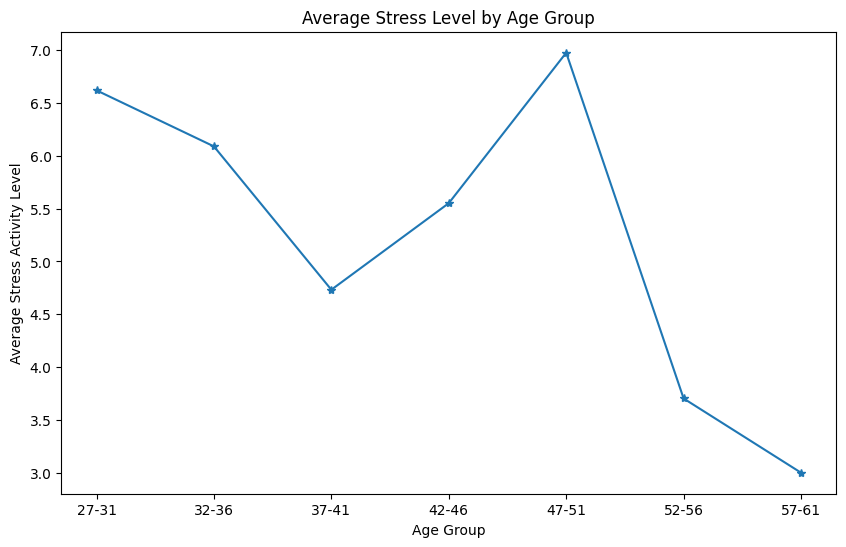

In [ ]:
stress_level = []

for i in range(min(df['Age']),max(df['Age']),5):
  age_group_df = df[(df['Age'] >= i) & (df['Age'] <= i+4)]
  stress = age_group_df['Stress Level'].mean()
  stress_level.append(stress)

plt.figure(figsize=(10, 6))
plt.plot(age_groups, stress_level, marker='*')
plt.xlabel('Age Group')
plt.ylabel('Average Stress Activity Level')
plt.title('Average Stress Level by Age Group')
plt.show()


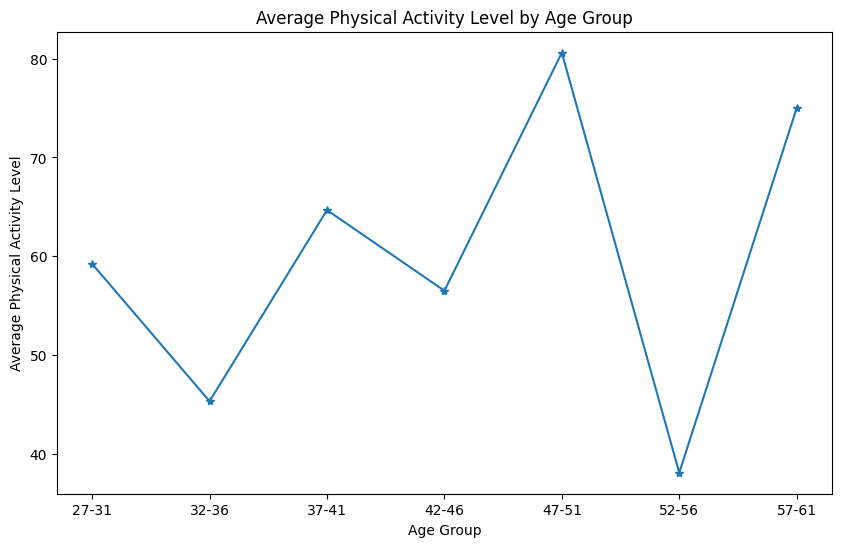

In [ ]:
physical_act_level = []

for i in range(min(df['Age']),max(df['Age']),5):
  age_group_df = df[(df['Age'] >= i) & (df['Age'] <= i+4)]
  physical_act = age_group_df['Physical Activity Level'].mean()
  physical_act_level.append(physical_act)
plt.figure(figsize=(10, 6))
plt.plot(age_groups, physical_act_level, marker='*')
plt.xlabel('Age Group')
plt.ylabel('Average Physical Activity Level')
plt.title('Average Physical Activity Level by Age Group')
plt.show()


In [ ]:
gender_sleep_disorder_counts = df.groupby(['Gender', 'Sleep Disorder']).size().unstack()
traces = []
for sleep_disorder_status in gender_sleep_disorder_counts.columns:
    trace = go.Bar(
        x=gender_sleep_disorder_counts.index,
        y=gender_sleep_disorder_counts[sleep_disorder_status],
        name=sleep_disorder_status
    )
    traces.append(trace)

layout = go.Layout(
    title='Distribution of Sleep Disorder by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Count'),
    barmode='group'
)

fig = go.Figure(data=traces, layout=layout)

fig.show()


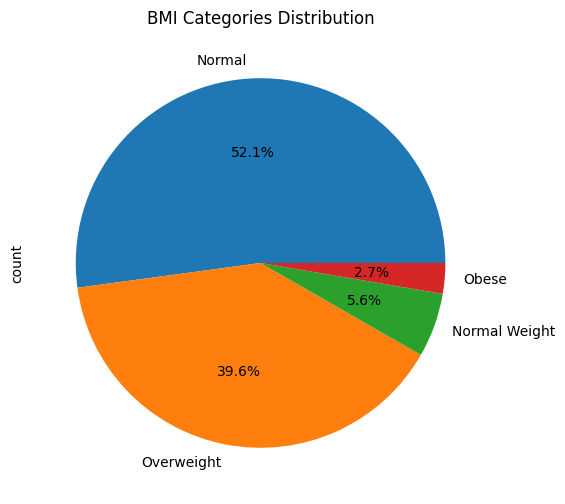

In [ ]:
# Pie Chart of BMI Categories
plt.figure(figsize=(20, 6))
df['BMI Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('BMI Categories Distribution')
plt.show()

In [ ]:
def preprocess_blood_pressure(bp_str):
    systolic, diastolic = bp_str.split('/')
    return float(systolic), float(diastolic)

df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].apply(lambda x: pd.Series(preprocess_blood_pressure(x)))

df.drop(columns=['Blood Pressure'], inplace=True)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


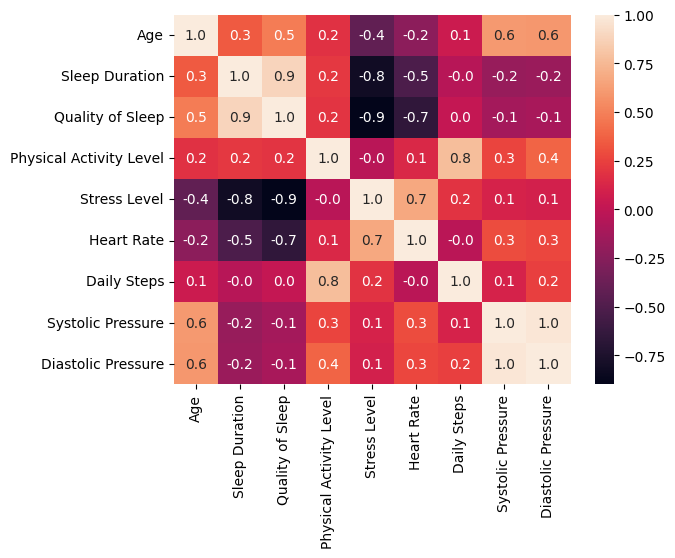

In [ ]:
sns.heatmap(df[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps','Systolic Pressure','Diastolic Pressure']].corr(),annot=True,fmt="1.1f")
plt.show()

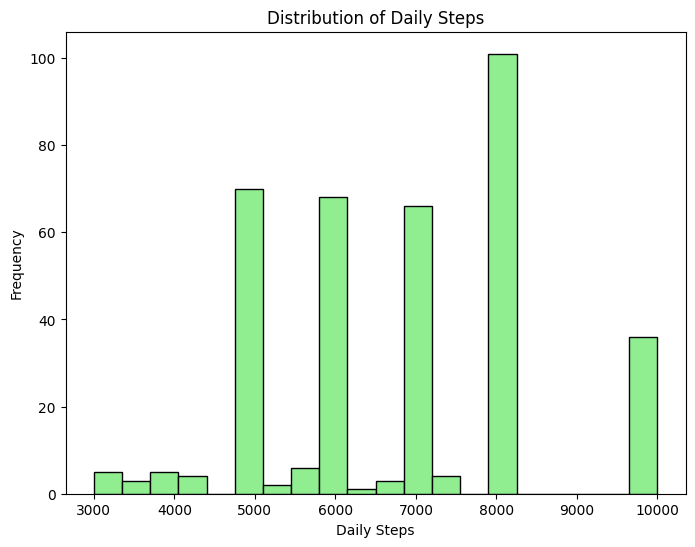

In [ ]:
# Histogram of Daily Steps
plt.figure(figsize=(8, 6))
plt.hist(df['Daily Steps'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Steps')
plt.show()

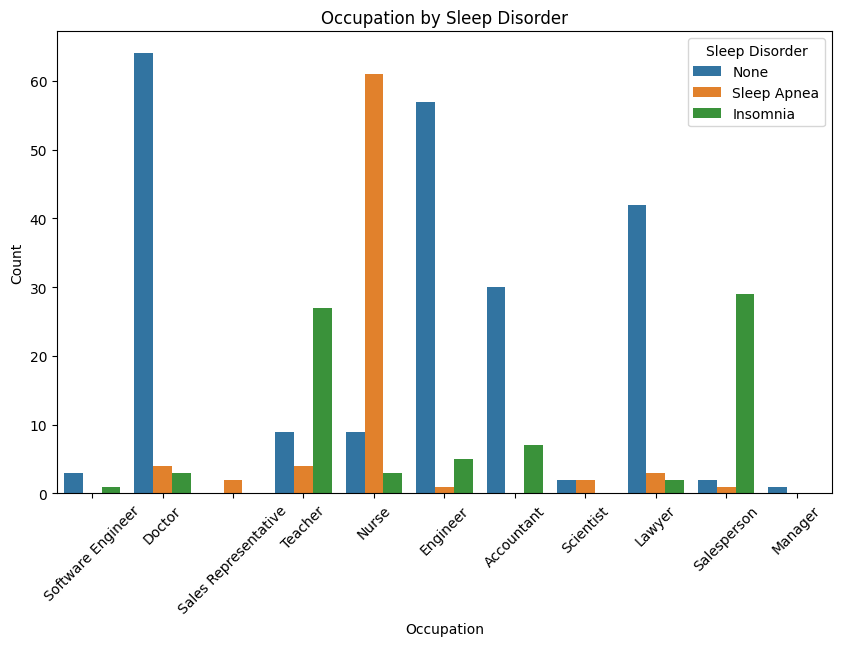

In [ ]:
# Stacked Bar Chart of Occupation by Sleep Disorder
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Sleep Disorder', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Sleep Disorder')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.show()

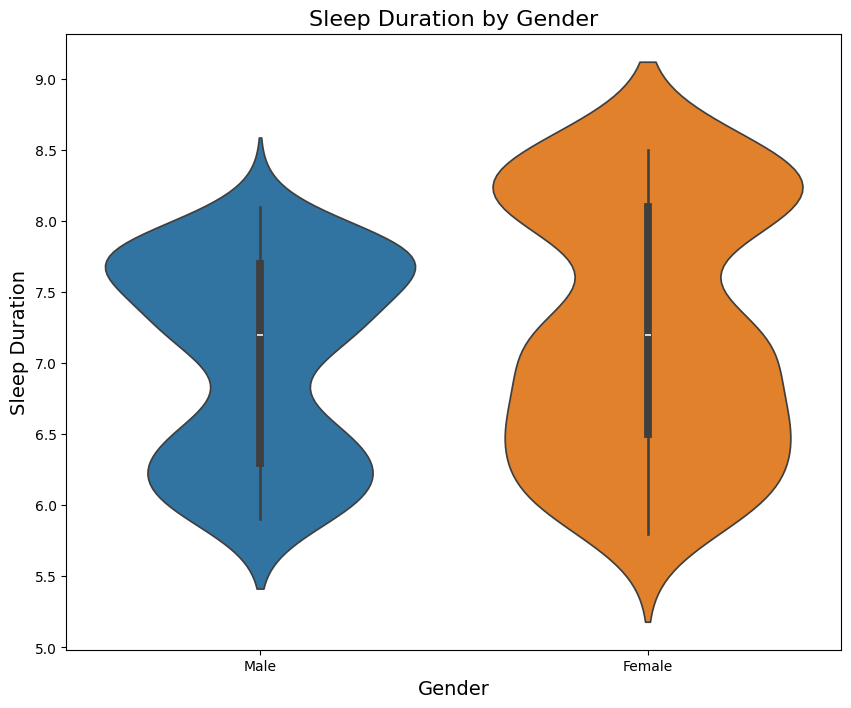

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='Gender', y='Sleep Duration',hue='Gender')
plt.title('Sleep Duration by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Sleep Duration', fontsize=14)
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

avg_stress_by_occupation = df.groupby('Occupation')['Stress Level'].mean().reset_index()

color_scale = [[0, 'blue'],
               [0.25,'green'],
               [0.5,'yellow'],
               [0.75,'orange'],
               [1, 'red']]

fig1 = go.Figure(go.Bar(
    x=avg_stress_by_occupation['Stress Level'],
    y=avg_stress_by_occupation['Occupation'],
    marker=dict(color=avg_stress_by_occupation['Stress Level'],
                coloraxis='coloraxis'),
    orientation='h',
    hoverinfo='x+y',
    textposition='inside',
    texttemplate='%{x:.2f}',
))

fig1.update_layout(
    title='Average Stress Level by Occupation',
    yaxis=dict(title='Occupation', tickangle=-30),
    xaxis=dict(title='Average Stress Level'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgb(240, 240, 240)',
    bargap=0.15,
    font=dict(family='Arial', size=12, color='rgb(50, 50, 50)'),
    coloraxis=dict(colorscale=color_scale, cmin=0, cmax=8),
)

# Show the plot
fig1.show()


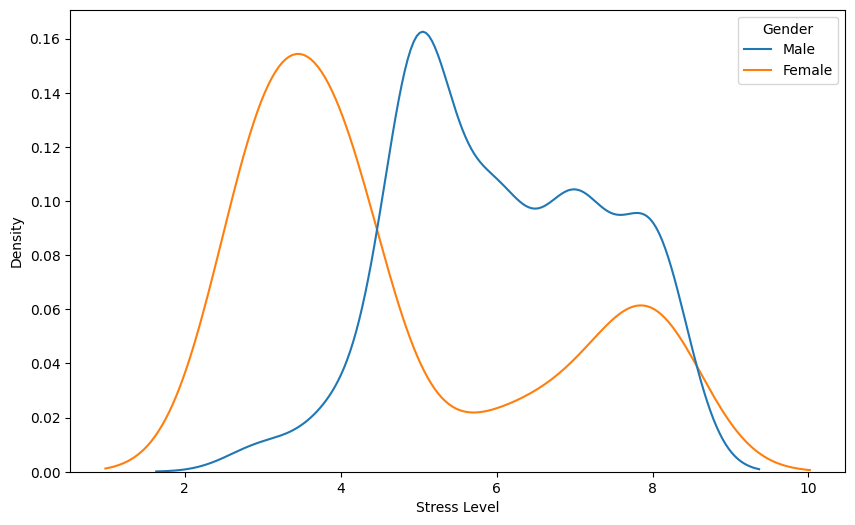

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(data=df, x= "Stress Level", hue= "Gender")
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

occupations = df['Occupation'].unique()
fig = go.Figure()
for i, occupation in enumerate(occupations):
    occupation_data = df[df['Occupation'] == occupation]['Sleep Duration']
    fig.add_trace(go.Box(y=occupation_data, name=occupation))

fig.update_layout(
    title='Sleep Duration by Occupation',
    xaxis=dict(title='Occupation'),
    yaxis=dict(title='Sleep Duration')
)

fig.show()


In [ ]:
lower_bound,upper_bound = min(df['Sleep Duration']), max(df['Sleep Duration'])
filtered_df = df[(df['Sleep Duration'] >= lower_bound) & (df['Sleep Duration'] <= upper_bound)]
sleep_count = filtered_df.groupby(['Sleep Duration', 'Gender']).size().reset_index(name='Count')

In [ ]:
pivot_df = sleep_count.pivot(index='Sleep Duration', columns='Gender', values='Count').reset_index()
pivot_df=pivot_df.fillna(0)
print(pivot_df)

Gender  Sleep Duration  Female  Male
0                  5.8     2.0   0.0
1                  5.9     1.0   3.0
2                  6.0    13.0  18.0
3                  6.1    15.0  10.0
4                  6.2     6.0   6.0
5                  6.3     0.0  13.0
6                  6.4     2.0   7.0
7                  6.5    12.0  14.0
8                  6.6    18.0   2.0
9                  6.7     3.0   2.0
10                 6.8     4.0   1.0
11                 6.9     2.0   1.0
12                 7.1    13.0   6.0
13                 7.2    22.0  14.0
14                 7.3     0.0  14.0
15                 7.4     1.0   4.0
16                 7.5     1.0   4.0
17                 7.6     0.0  10.0
18                 7.7     0.0  24.0
19                 7.8     0.0  28.0
20                 7.9     1.0   6.0
21                 8.0    13.0   0.0
22                 8.1    13.0   2.0
23                 8.2    11.0   0.0
24                 8.3     5.0   0.0
25                 8.4    14.0   0.0
2

In [ ]:
lower_bound,upper_bound = min(df['Stress Level']), max(df['Stress Level'])
filtered_df = df[(df['Stress Level'] >= lower_bound) & (df['Stress Level'] <= upper_bound)]
stress_count = filtered_df.groupby(['Stress Level', 'Gender']).size().reset_index(name='Count')
pivot_df = stress_count.pivot(index='Stress Level', columns='Gender', values='Count').reset_index()
stress_df=pivot_df.fillna(0)
stress_df

Gender,Stress Level,Female,Male
0,3,67,4
1,4,61,9
2,5,2,65
3,6,9,37
4,7,12,38
5,8,34,36


In [ ]:
def normalize_column(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = round(1 + ((df[column_name] - min_value) * 9) / (max_value - min_value))

In [ ]:
normalize_column(df,'Physical Activity Level')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,3.0,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,6.0,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,6.0,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,1.0,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,1.0,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [ ]:
min(df['Physical Activity Level']),max(df['Physical Activity Level'])

(1.0, 10.0)

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic Pressure', 'Diastolic Pressure'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Person ID','Gender','Age','Gender','Quality of Sleep','Occupation','Sleep Disorder'])
y = df['Sleep Disorder']
X.columns

Index(['Sleep Duration', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic Pressure',
       'Diastolic Pressure'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder


numerical_features = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate',
                      'Stress Level', 'Systolic Pressure', 'Diastolic Pressure', 'Daily Steps']

label_encoder1 = LabelEncoder()
X['BMI Category']= label_encoder1.fit_transform(X['BMI Category'])


label_encoder2= LabelEncoder()
y = label_encoder2.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.head()

,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
0,6.1,3.0,6,3,77,4200,126.0,83.0
1,6.2,6.0,8,0,75,10000,125.0,80.0
2,6.2,6.0,8,0,75,10000,125.0,80.0
3,5.9,1.0,8,2,85,3000,140.0,90.0
4,5.9,1.0,8,2,85,3000,140.0,90.0


In [ ]:
bmi_mapping = {i: label for i, label in enumerate(label_encoder1.classes_)}
print(bmi_mapping)

{0: 'Normal', 1: 'Normal Weight', 2: 'Obese', 3: 'Overweight'}


In [ ]:
label_mapping = {i: label for i, label in enumerate(label_encoder2.classes_)}
print(label_mapping)

{0: 'Insomnia', 1: 'None', 2: 'Sleep Apnea'}


In [ ]:
X_train.columns

Index(['Sleep Duration', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic Pressure',
       'Diastolic Pressure'],
      dtype='object')

In [ ]:
X_train.shape

(299, 8)

## Training ML Classifiers

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")
    accuracies[name] = accuracy

# Create a line chart with plotly
fig = make_subplots()

model_names = list(accuracies.keys())
fig.add_trace(go.Scatter(x=model_names, y=list(accuracies.values()), name="Accuracy"))

fig.update_layout(
    title="Model Accuracies",
    xaxis_title="Model",
    yaxis_title="Accuracy",
)

fig.show()


Model: Decision Tree, Accuracy: 0.88
Model: Random Forest, Accuracy: 0.88
Model: Logistic Regression, Accuracy: 0.88
Model: SVM, Accuracy: 0.64
Model: KNN, Accuracy: 0.8666666666666667
Model: Gaussian Naive Bayes, Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
model = DecisionTreeClassifier()
model.fit(X,y)
user_input = []
for feature in X_train.columns:
  value = input(f"Enter {feature}: ")
  user_input.append(value)

user_input = np.array(user_input).reshape(1, -1)
prediction = model.predict(user_input)
print(prediction)
print(f"Predicted Sleep Disorder: {label_mapping[prediction[0]]}")


Enter Sleep Duration: 6
Enter Physical Activity Level: 5
Enter Stress Level: 8
Enter BMI Category: 2
Enter Heart Rate: 80
Enter Daily Steps: 7000
Enter Systolic Pressure: 120
Enter Diastolic Pressure: 80
[1]
Predicted Sleep Disorder: None


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



## DL Model Training

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()
y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1)).toarray()


In [ ]:
from keras import regularizers

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 256)               2304      
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_53 (Dense)            (None, 512)               131584    
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_54 (Dense)            (None, 256)               131328    
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                      

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train_encoded, epochs=200, validation_data=(X_test, y_test_encoded))
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/200
10/10 [==============================] - 3s 69ms/step - loss: 4.4621 - acc: 0.4013 - val_loss: 4.6068 - val_acc: 0.2000
Epoch 2/200
10/10 [==============================] - 0s 20ms/step - loss: 4.3408 - acc: 0.5518 - val_loss: 4.5394 - val_acc: 0.2133
Epoch 3/200
10/10 [==============================] - 0s 22ms/step - loss: 4.2280 - acc: 0.5318 - val_loss: 4.4703 - val_acc: 0.5867
Epoch 4/200
10/10 [==============================] - 0s 23ms/step - loss: 4.1253 - acc: 0.5920 - val_loss: 4.4350 - val_acc: 0.5733
Epoch 5/200
10/10 [==============================] - 0s 20ms/step - loss: 4.0203 - acc: 0.5452 - val_loss: 4.4163 - val_acc: 0.5733
Epoch 6/200
10/10 [==============================] - 0s 12ms/step - loss: 3.9159 - acc: 0.5719 - val_loss: 4.3817 - val_acc: 0.5733
Epoch 7/200
10/10 [==============================] - 0s 12ms/step - loss: 3.8001 - acc: 0.6120 - val_loss: 4.3358 - val_acc: 0.5733
Epoch 8/200
10/10 [==============================] - 0s 12ms/step - loss: 3.

In [ ]:
_,model_acc=model.evaluate(X_test,y_test_encoded)
print(model_acc)
accuracies['ANN']=model_acc

3/3 [==============================] - 0s 13ms/step - loss: 0.7706 - acc: 0.8667
0.8666666746139526


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



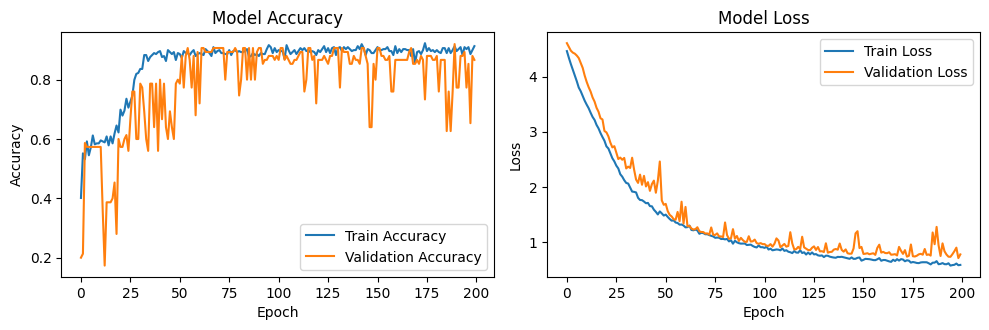

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


12/12 [==============================] - 0s 3ms/step


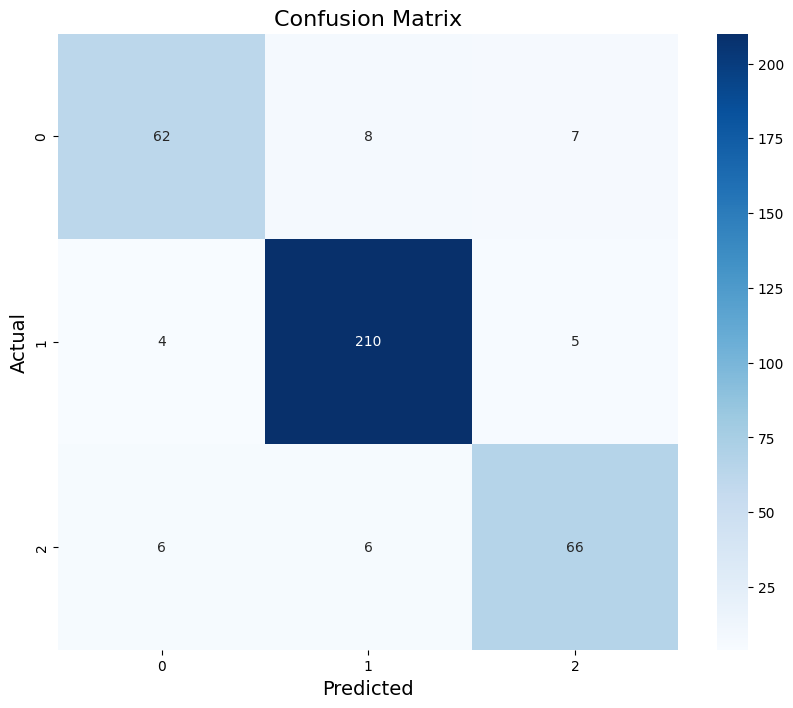

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X).argmax(axis=1)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [90]:
print(accuracies)

{'Decision Tree': 0.88, 'Random Forest': 0.88, 'Logistic Regression': 0.88, 'SVM': 0.64, 'KNN': 0.8666666666666667, 'Gaussian Naive Bayes': 0.88, 'ANN': 0.8666666746139526}


In [91]:
fig = go.Figure(
    go.Scatter(
        x=list(accuracies.keys()),
        y=list(accuracies.values()),
        mode='markers+lines',
        marker=dict(symbol='star')
    )
)

fig.update_layout(
    title='Model Accuracies',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Accuracy')
)

fig.show()

## Conclusion
- Decision Tree, Random Forest, Logistic Regression, and Gaussian Naive Bayes achieved comparable accuracies of 88%. These models demonstrate robustness and effectiveness in capturing patterns within the dataset.

- K-Nearest Neighbors (KNN) also performed well with an accuracy of approximately 86.67%, indicating its suitability for classification tasks where instances are grouped based on similarity.

- However, the Support Vector Machine (SVM) model lagged behind with an accuracy of 64%, suggesting potential challenges in properly separating the data points in the feature space.

Overall, the decision tree-based models, Random Forest and Decision Tree, along with Logistic Regression and Gaussian Naive Bayes, exhibit promising performance and could be considered as strong candidates for further evaluation and deployment, while further optimization may be necessary for SVM to enhance its performance.